<a href="https://colab.research.google.com/github/parthnirmal18/Data-Science-Mini-project/blob/main/Medical_Insurance_cost_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [18]:
df = pd.read_csv('insurance.csv')

In [19]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Axes: xlabel='sex', ylabel='expenses'>

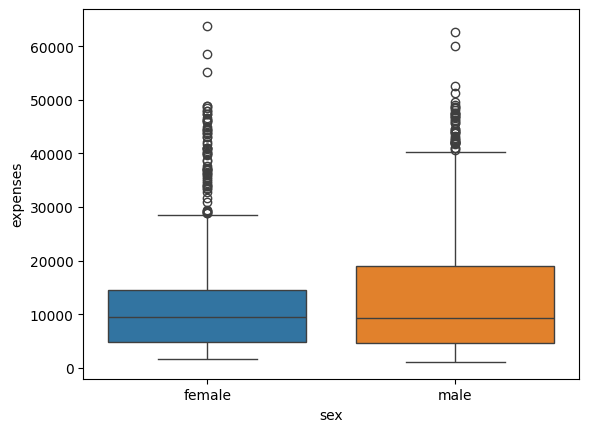

In [22]:
sns.boxplot(x = 'sex',y = 'expenses', hue = 'sex',data = df)

<Axes: xlabel='sex', ylabel='count'>

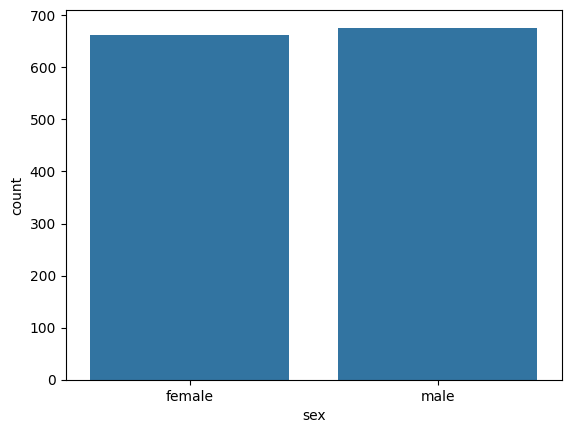

In [23]:
sns.countplot(x = 'sex', data = df)

<ipython-input-24-176d96ab59d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


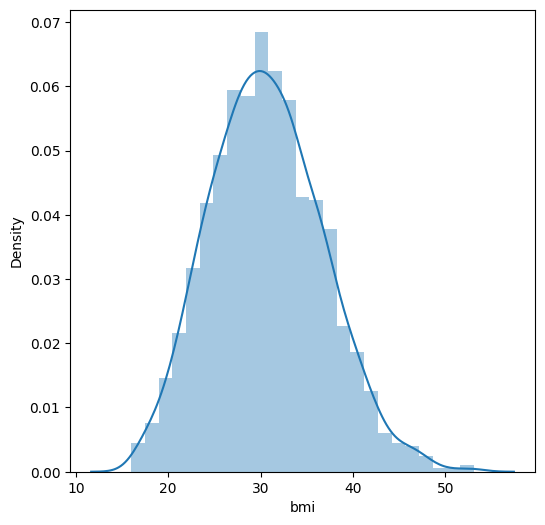

In [24]:
plt.figure(figsize = (6,6))
sns.distplot(df['bmi'])
plt.show()

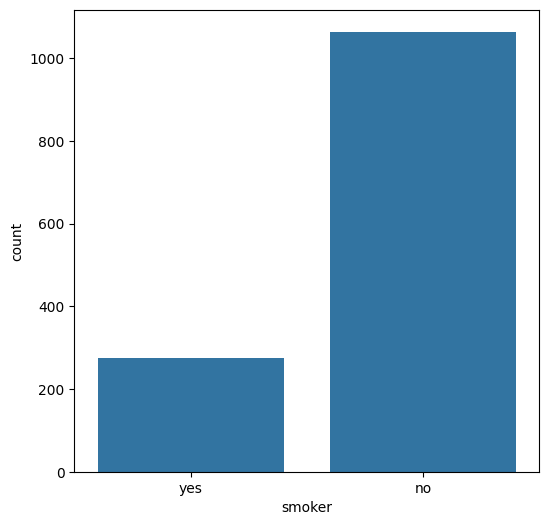

In [25]:
plt.figure(figsize = (6,6))
sns.countplot(x = df['smoker'])
plt.show()

In [26]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [27]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

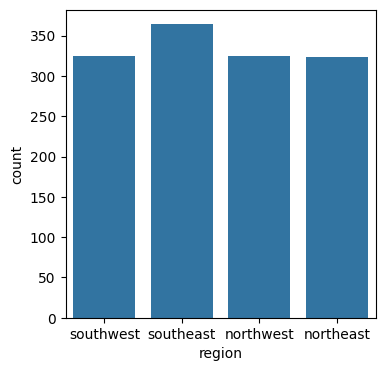

In [28]:
plt.figure(figsize = (4,4))
sns.countplot(x = df['region'], data = df)
plt.show()

In [29]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-30-1d5da8f2a155>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'])


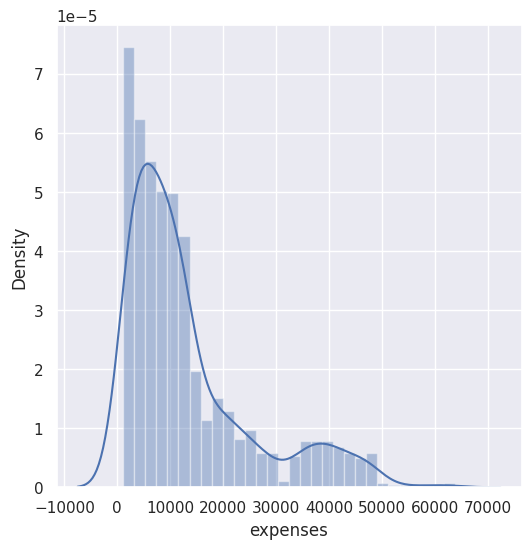

In [30]:
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['expenses'])
plt.show()

In [31]:
df['sex'].replace({'male': 1, 'female':0}, inplace = True)
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95


In [32]:
df['smoker'].replace({'yes': 1, 'no':0}, inplace = True)
df['region'].replace({'northeast': 0, 'northwest':1,'southeast' : 2, 'southwest' : 3}, inplace = True)

In [33]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [34]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
expenses    float64
dtype: object

In [35]:
x = df.drop('expenses', axis = 'columns')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [36]:
y = df['expenses']


In [37]:
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [38]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=1)


In [39]:
print(x_train.shape)
print(x_test.shape)

(1070, 6)
(268, 6)


In [40]:
print(y_train.shape)
print(y_test.shape)

(1070,)
(268,)


In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.762331239232596

In [42]:
y_pred = lr.predict(x_test)
print('first 5 pred : ',y_pred[:5] )
r2_score = metrics.r2_score(y_test, y_pred)
print('r2_score : ',r2_score)
print('actual first 5 pred : \n', y_test[:5])

first 5 pred :  [ 4302.71148328 12845.80233641 12370.42647892 13539.88549056
   409.96269304]
r2_score :  0.762331239232596
actual first 5 pred : 
 559      1646.43
1087    11353.23
1020     8798.59
460     10381.48
802      2103.08
Name: expenses, dtype: float64


In [43]:
input = (28,1,33,3,0,2)
input_arr = np.asarray(input)
input_data = input_arr.reshape(1,-1)

pred = lr.predict(input_data)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6743.21235713])

In [44]:
cross_val_score(LinearRegression(),x, y , cv = 5)

array([0.76123664, 0.70840336, 0.77787785, 0.73369063, 0.7551539 ])

In [45]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(),x, y , cv = cv)


array([0.79990534, 0.747953  , 0.71092976, 0.77432601, 0.80803559])

In [47]:
def find_best_model(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                # 'normalize': [True, False]
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'lasso' : {
             'model' : Lasso(),
            'params' : {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
           }
        },
    }

    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size = 0.2, random_state = 0)
    for algo_names,config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_names,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [48]:
find_best_model(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.768230,{}
1,decision_tree,0.724056,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,lasso,0.768228,"{'alpha': 1, 'selection': 'random'}"


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6743.21235713])